In [1]:
import vaex
import numpy as np
from matplotlib import pyplot as plt
from os.path import join, abspath
from scipy import interpolate
from glob import glob
import sys

In [2]:
root_dir = abspath(join(".."))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/4_Vertical_Number',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import safe_mkdir, style

style()

In [5]:
root_data_dir = abspath(join(root_dir, "Data"))
comp_dir = join(root_data_dir, "Effective-Completeness")
spectral_dir = join(root_data_dir, "Color")

In [6]:
data_dir = join(root_data_dir, "Effective-Volume")
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Effective-Volume already exist. Good to go!


In [7]:
files = glob(join(comp_dir, "*.hdf5"))
files.sort()
files = files[:15]
files

['/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(-0.019)_(0.124).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.124)_(0.188).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.188)_(0.219).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.219)_(0.241).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.241)_(0.259).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.259)_(0.275).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.275)_(0.288).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.288)_(0.300).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.300)_(0.312).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.312)_(0.323).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Completeness/comp_(0.323)_(0.333).hdf5',
 '/home2/

In [8]:
index = 0
name = files[index].split("/")[-1]
name

'comp_(-0.019)_(0.124).hdf5'

In [9]:
df_comp = vaex.open(join(comp_dir, name))
df_comp

#,dm,comp
0,-4.0,1.6664531912078738e-10
1,-3.808080808080808,5.629656939656256e-10
2,-3.6161616161616164,1.8265418071756009e-09
3,-3.4242424242424243,5.692408691587433e-09
4,-3.2323232323232323,1.7043004586889648e-08
...,...,...
95,14.232323232323232,0.010108456733988627
96,14.424242424242422,0.006049613030132633
97,14.616161616161616,0.0035029242589121232
98,14.808080808080806,0.001961540113989624


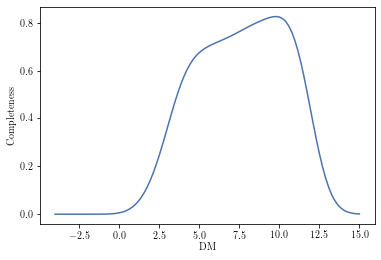

In [10]:
compDM = df_comp["comp"].to_numpy()
DM = df_comp["dm"].to_numpy()

# plot
plt.plot(DM, compDM)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()


# plot for all

In [11]:
bound = np.load(join(root_data_dir, "boundaries.npy"))
c1 = bound[:,0]
c2 = bound[:,1]

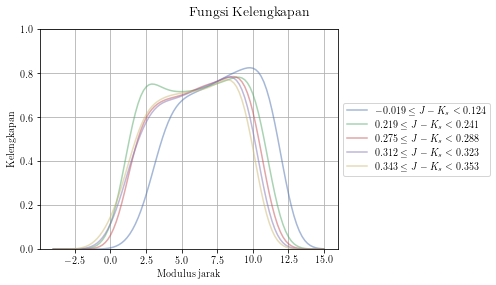

'comp_(0.343)_(0.353).hdf5'

In [12]:
import re

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")

# plot
fig, ax = plt.subplots(figsize=(7, 4))
for file, bo in zip(files[::3], bound[::3]):
    name = file.split("/")[-1]
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["comp"].to_numpy()
    DM = df_comp["dm"].to_numpy()
    ax.plot(DM, compDM, label=r"${}\leq J-K_s < {}$".format(np.round(bo[0],3), np.round(bo[1],3)), alpha=0.5)
ax.set_xlabel("Modulus jarak")
ax.set_ylabel("Kelengkapan")
ax.set_ylim(0, 1)
ax.grid()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.suptitle("Fungsi Kelengkapan", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# fig.savefig(join('..', 'img', "fungsi-kelengkapan-no.pdf"), dpi=200)
plt.show()

name

interpolate compDM, set to 0 if beyond the range

In [13]:
compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False, kind="cubic")

compDM_interp(-20)

array(0.)

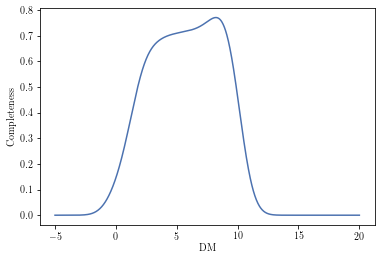

In [14]:
dms = np.linspace(-5, 20, 1000)
compDMs = compDM_interp(dms)

# plot
plt.plot(dms, compDMs)
plt.xlabel("DM")
plt.ylabel("Completeness")
plt.show()

In [15]:
R = 150
Z = 300

In [16]:
# divide space into small tube with rings
ez = np.linspace(-Z, Z, 100) #edges
er = np.linspace(0, R, 100)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2

dz = ez[1]-ez[0]

In [17]:
from tqdm import tqdm

frac = []
for zz in tqdm(z):
    real_vol = 0
    eff_vol = 0
    for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
        glat = np.arctan(zz/rr)
        dv = np.pi*(r_out**2-r_in**2)*dz
        real_vol += dv
        distance =np.sqrt(rr**2+zz**2)
        dm = 5*np.log10(distance)-5
        # b = np.arctan(zz/rr)
        # if np.abs(zz) < 50:
        eff_vol += dv*compDM_interp(dm)
    frac.append(eff_vol/real_vol)


100%|██████████| 99/99 [00:00<00:00, 214.80it/s]


(0.0, 1.0)

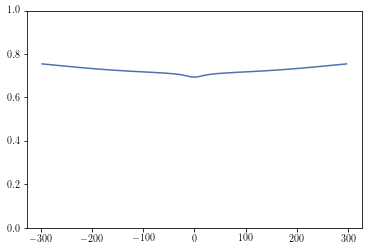

In [18]:
plt.plot(z, frac)
plt.ylim(0,1)

# all out

only for index 0 and 2, cut the midplane

100%|██████████| 499/499 [00:02<00:00, 217.50it/s]


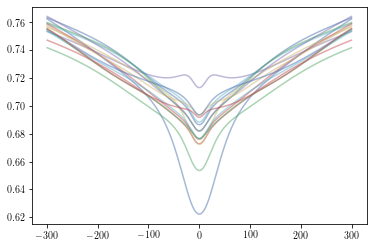

In [20]:
from tqdm import tqdm
import re
import matplotlib.pylab as pl

# regex to extract number between ()
regex = re.compile(r"\((.*?)\)")
Z = 300
R = 150
ez = np.linspace(-Z, Z, 500) #edges
er = np.linspace(0, R, 200)
z = (ez[:-1]+ez[1:])/2
r = (er[:-1]+er[1:])/2
dms = np.linspace(-20, 20, 1000)
dz = ez[1]-ez[0]
colors = pl.cm.jet(np.linspace(0,1,len(files)))
fig, ax = plt.subplots(figsize=(6, 4))
fracs = np.empty((len(files), len(z)))
names = []
for i, (file, bo) in enumerate(zip(files, bound)):
    name = file.split("/")[-1]
    names.append(name)
    df_comp = vaex.open(join(comp_dir, name))
    compDM = df_comp["comp"].to_numpy()
    DM = df_comp["dm"].to_numpy()
    compDM_interp = interpolate.interp1d(DM, compDM, fill_value=0, bounds_error=False)
    compDMs = compDM_interp(dms)
    # plt.plot(dms, compDMs, color=colors[i], alpha=0.5)
    # continue
    frac = []
    for zz in tqdm(z):
        real_vol = 0
        eff_vol = 0
        for j, (rr, r_in, r_out) in enumerate(zip(r, er[:-1], er[1:])):
            glat = np.arctan(zz/rr)
            dv = np.pi*(r_out**2-r_in**2)*dz
            real_vol += dv
            distance =np.sqrt(rr**2+zz**2)
            dm = 5*np.log10(distance)-5
            b = np.arctan(zz/rr)
            # if np.abs(zz) < 13.79310345 and i < 1:
            #     continue
            eff_vol += dv*compDM_interp(dm)
        frac.append(eff_vol/real_vol)
    # if i % 4 == 0:
        # ax.plot(z, frac, label=r"${}\leq c < {}$".format(c[0], c[1]), alpha=0.5)
    ax.plot(z, frac, label=r"${}\leq c < {}$".format(np.round(bo[0],3), np.round(bo[1],3)), alpha=0.5)
    fracs[i] = frac
    df = vaex.from_arrays(z=z, frac=frac)
    # df.export(join(data_dir, name), progress=True)
# ax.set_xlabel(r"$z$ (pc)")
# ax.set_ylabel("Kelengkapan Efektif")
# ax.grid()
# ax.set_ylim(0,1)
# ax.set_xlim(-Z, Z)
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.suptitle("Fungsi Kelengkapan Efektif", fontsize=14)
# fig.tight_layout()
# fig.subplots_adjust(top=0.90)
# fig.savefig(join('..', 'img', "fungsi-kelengkapan-efektif.pdf"), dpi=200)

In [21]:
len(fracs)

15

In [22]:
# import re
# c1, c2 = [], []
# # get the value between () of the file name
# for f in names:
#     c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
#     c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
# c1 = np.array(c1)
# c2 = np.array(c2)
# c = 0.5*(c1+c2)
# c

In [23]:
len(fracs[0])

499

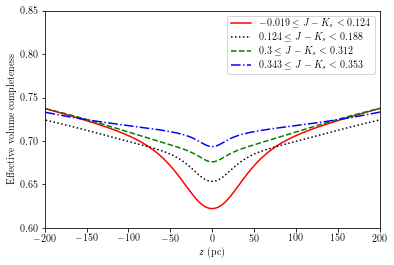

In [24]:
i_samples = [0, 1, 8, 12]
style_samples = ["solid", "dotted", "dashed", "dashdot"]
color_samples = ["red", "black", "green", "blue"]

for i, ls, color in zip(i_samples, style_samples, color_samples):
  plt.plot(z, fracs[i], label=r"${}\leq J-K_s < {}$".format(np.round(c1[i],3), np.round(c2[i],3)), ls=ls, c=color)
plt.ylim(0.6,0.85)
plt.xlim(-200, 200)
plt.ylabel("Effective volume completeness")
plt.xlabel(r"$z$ (pc)")
plt.legend()
# plt.xlim(-Z, Z)
plt.savefig(join('img', "eff-volume.pdf"), dpi=70)
plt.show()

export(hdf5) [########################################] 100.00% elapsed time  :     0.02s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [########################################] 100.00% elapsed time  :     0.01s =  0.0m =  0.0h
export(hdf5) [################################

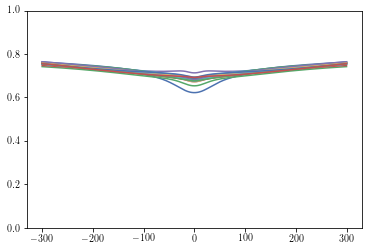

In [25]:
for frac, name in zip(fracs, names):
    plt.plot(z, frac)
    plt.ylim(0,1)

    df  = vaex.from_arrays(z=z, frac=frac)
    # print(df)
    df.export(join(data_dir, name), progress=True)